# **Importing Required Libraries**
Import the required libraries for the project to the Colab environment.
Import NumPy, Pandas, Seaborn, and Matplotlib libraries for data analysis
Import sklearn.model_selection, sklearn.metrics, sklearn.ensemble,
sklearn.linear_model, sklearn_tree, sklearn.neighbour libraries and modules
for modellling and evaluating performance of the model


In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor


# **Gathering and Observing Data**

Load the dataset to the project with the help of read_csv() and observe the first 5 columns.Find the shape, number of columns and size of the dataset.
Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [38]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [39]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


# **Exploratory Data Analysis**
Examine the descriptive statistics of dataset
The values of some variables are given as objects. At the same time, we observe
that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.Check for duplicate data. If there are duplicate data, clear them from the dataset.Clear outlier data in the dataset. When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables. We expect you to use the z-score method when detecting outliers in the
dataset! Find and remove the missing values on the dataset You can observe from the dataset that the missing values are in the bathroom and car variables. We expect the missing values in the dataset to be filled using the mode method.

In [40]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [41]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [43]:
cat_cols = []
num_cols = []

for i in df_copy.columns:
  if df_copy[i].dtypes == 'object':
    cat_cols.append(i)
  else:
    num_cols.append(i)

print("Categorical Columns",cat_cols)
print("Numerical Columns",num_cols)

Categorical Columns ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
Numerical Columns ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [44]:
df_copy.duplicated().sum()

1

In [45]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [46]:
df_copy =df_copy.drop_duplicates()
df_copy.duplicated().sum()

0

In [47]:
# z-score
outlier_columns = ['Landsize','BuildingArea']

for column in outlier_columns:
  z_scores = np.abs((df_copy[column] - df_copy[column].mean()) / df_copy[column].std())
  threshold = 3
  df_copy = df_copy[z_scores <= threshold]

In [48]:
df.shape

(34857, 21)

In [49]:
df_copy.shape

(12058, 21)

In [50]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                 0.000000
Address                               0                 0.000000
Rooms                                 0                 0.000000
Type                                  0                 0.000000
Price                              2739                22.715210
Method                                0                 0.000000
SellerG                               0                 0.000000
Date                                  0                 0.000000
Distance                              0                 0.000000
Postcode                              0                 0.000000
Bedroom2                              0                 0.000000
Bathroom                              0                 0.000000
Car                                 181                 1.501078
Landsize                              0                 0.000000
BuildingArea             

In [51]:
for column in cat_cols:
    if df_copy[column].isnull().any():
        mode_value = df_copy[column].mode().iloc[0]
        df_copy[column].fillna(mode_value, inplace=True)
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0


In [52]:
df_copy.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            2739
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               181
Landsize            0
BuildingArea        0
YearBuilt         411
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64

In [53]:
for column in num_cols:
  if df_copy[column].isnull().any():
      mean_value = df_copy[column].mean()
      df_copy[column].fillna(mean_value, inplace=True)
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1.600000e+06,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,1.093166e+06,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1.876000e+06,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0


In [54]:
df_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# **DATA VISUALIZATION**
Build a Histogram to visualize price distribution.Draw a pair plot to see the relationship between all numerical variables and the price variable.Draw a correlation matrix by using a heatmap on seaborn.Implement Label Encoder and One Hot encoder for categorical variables


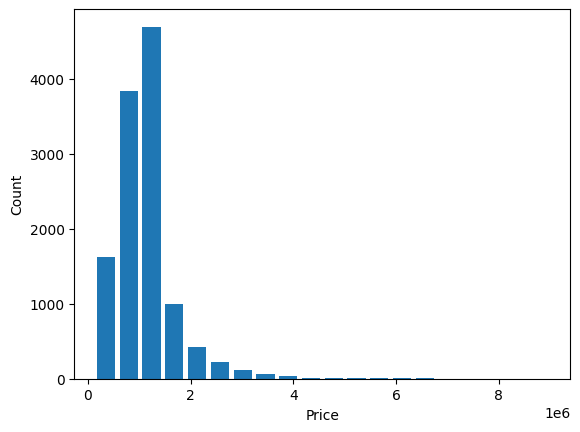

In [55]:
# Build a Histogram to visualize price distribution
plt.hist(df_copy.Price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

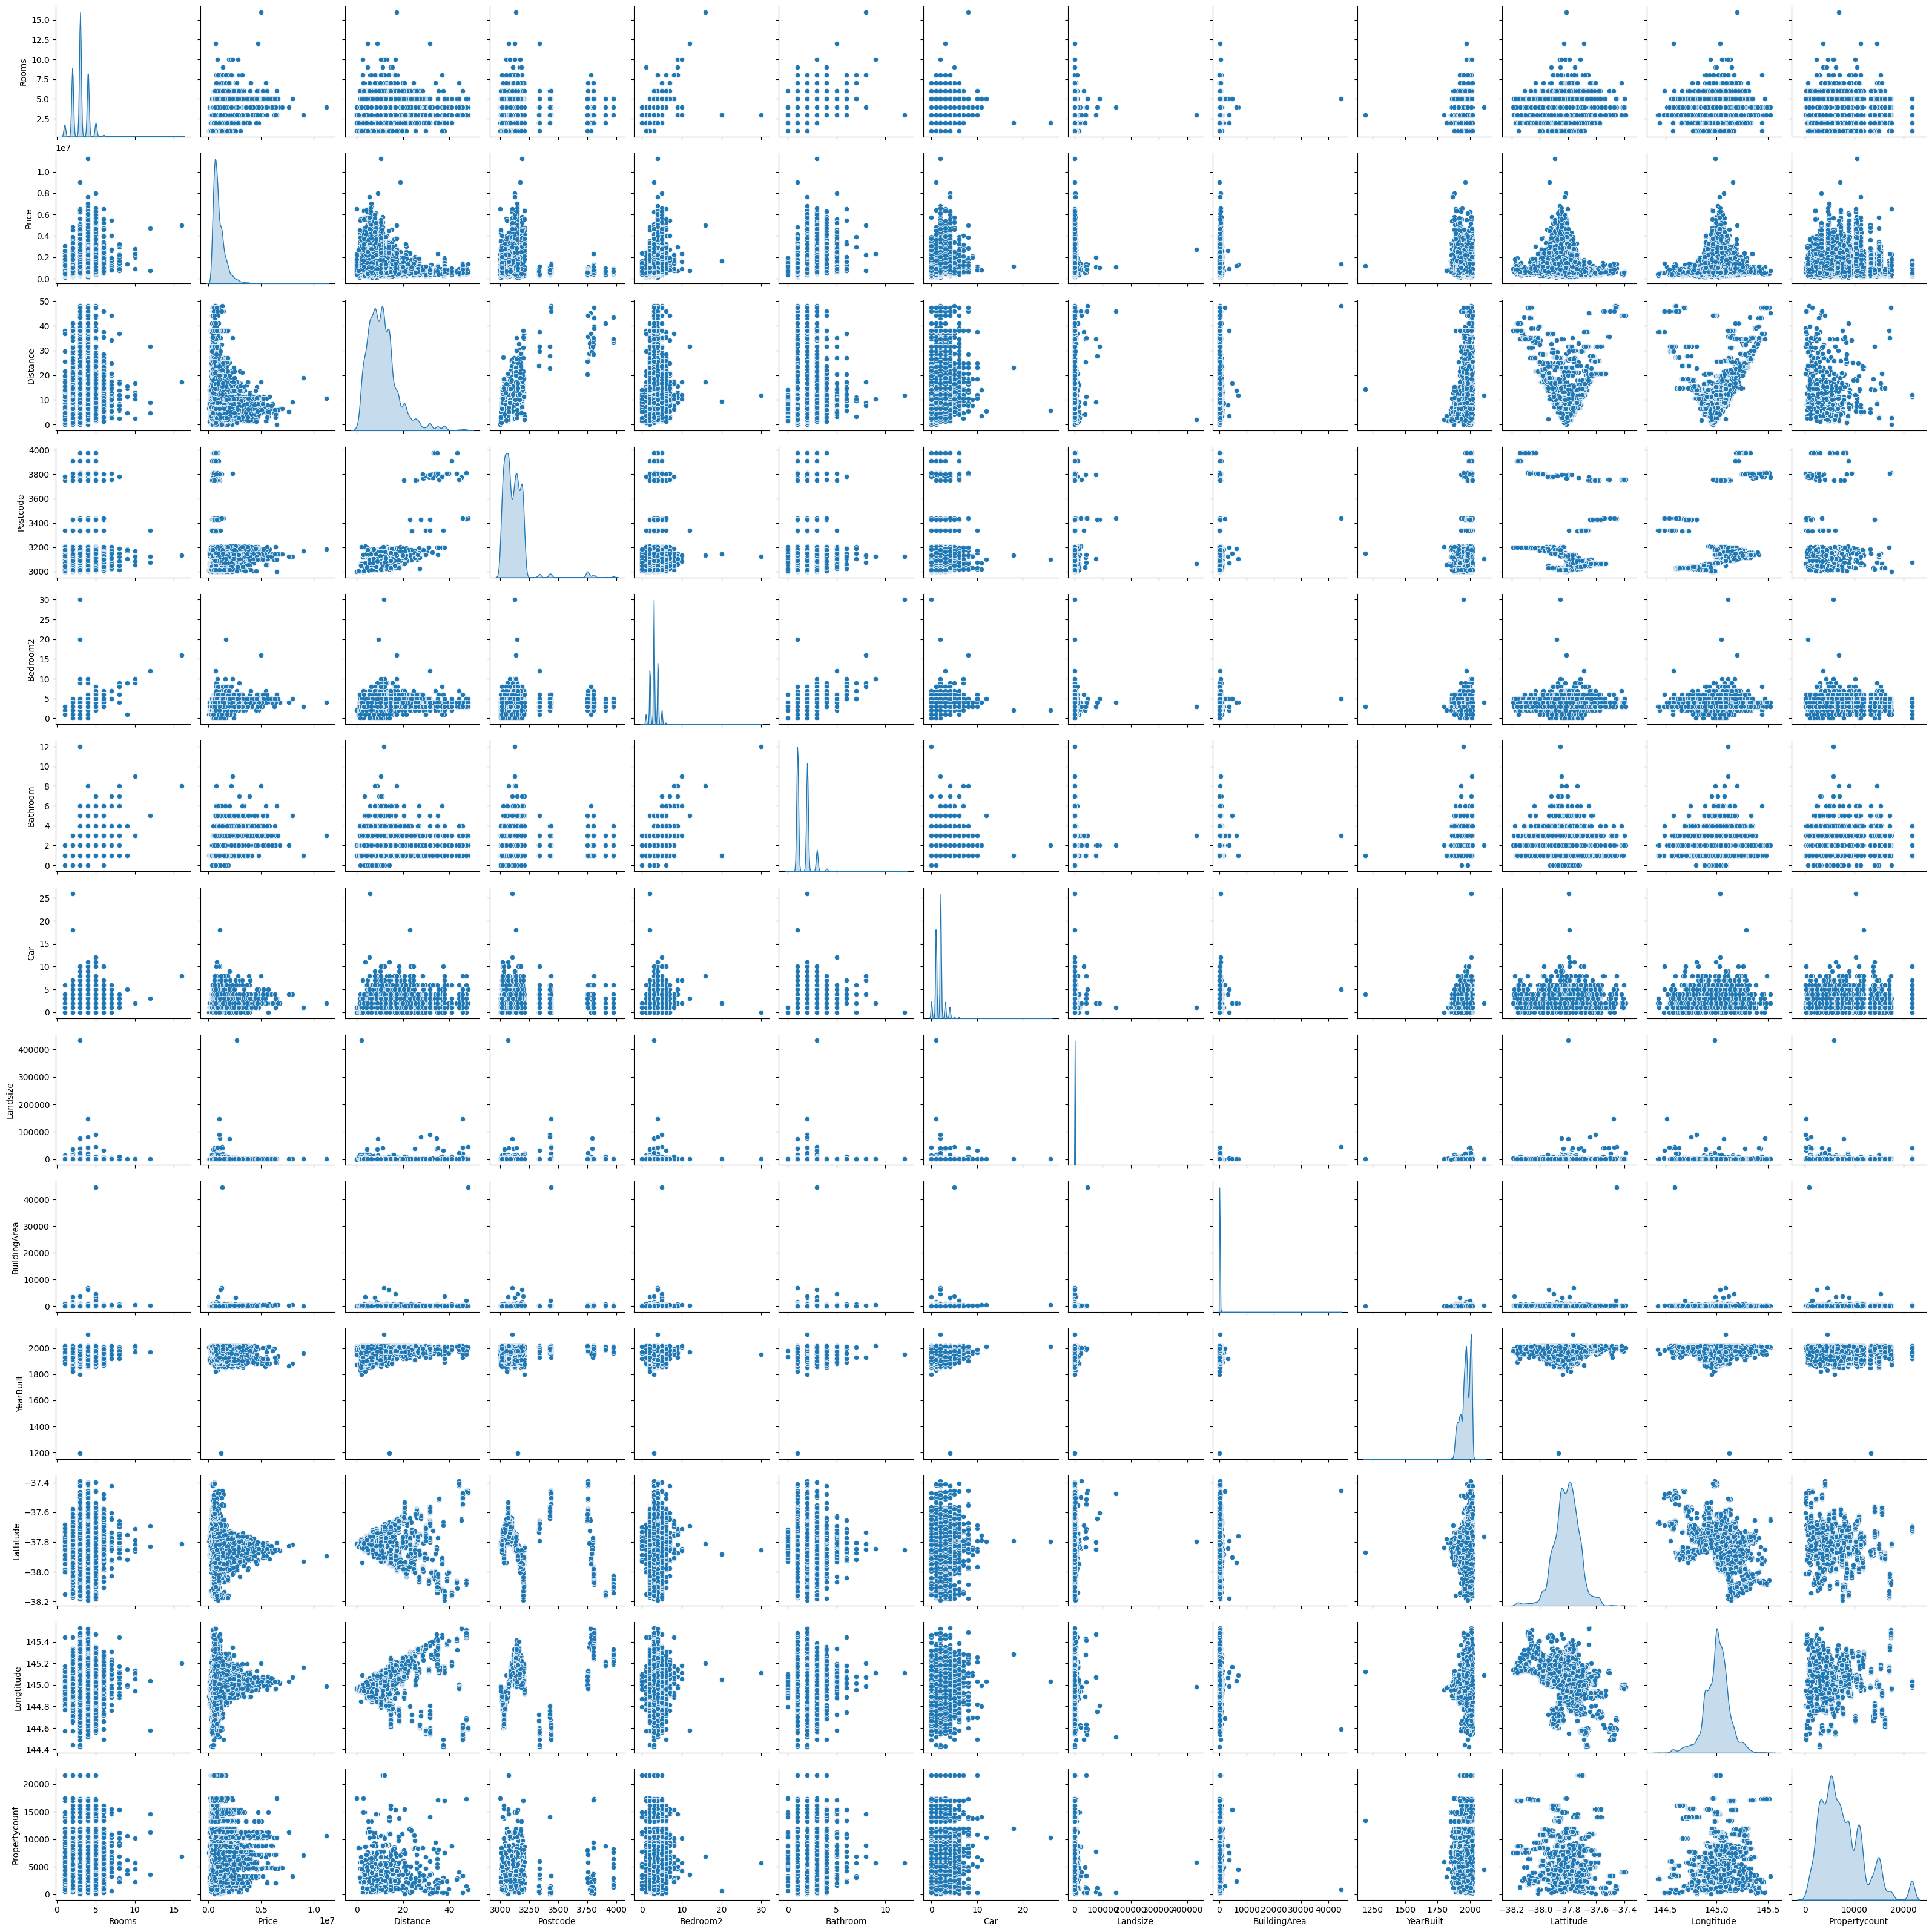

In [56]:
#Draw a pair plot to see the relationship between all numerical variables and
#the price variable.
sns.pairplot(df[num_cols], diag_kind='kde', kind='scatter')
plt.show()

<ipython-input-57-7b45eb412b76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


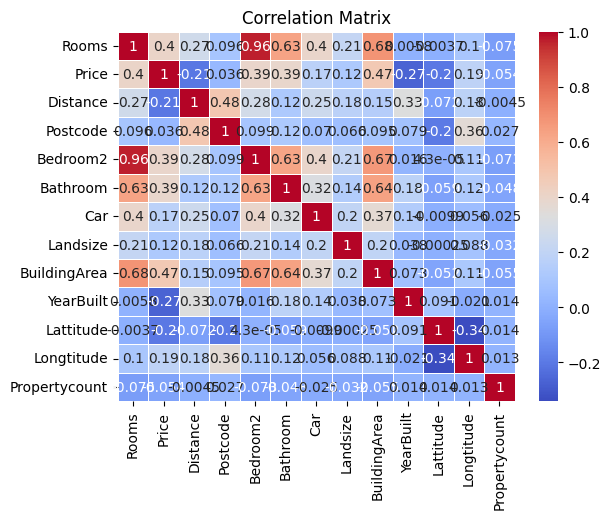

In [57]:
#Draw a correlation matrix by using a heatmap on seaborn
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title("Correlation Matrix")
plt.show()

In [58]:
#Implement Label Encoder and One Hot encoder for categorical variables
label_encoder = LabelEncoder()
for i in cat_cols:
  df_copy[i] = label_encoder.fit_transform(df_copy[i].values)

In [59]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,5282,2,0,1.035000e+06,2,22,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
4,0,8650,3,0,1.465000e+06,5,22,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
6,0,9317,4,0,1.600000e+06,7,161,65,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0
7,0,2867,4,0,1.093166e+06,4,161,69,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,31,-37.7965,144.9965,2,4019.0
11,0,1832,3,0,1.876000e+06,2,161,70,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0


In [60]:
# Since we are going to make a price estimation, we need to determine our x and y variables correctly.
#Splitting our data into train-test in order to increase the performance of model training
X = df_copy.drop("Price", axis = 1)
y = df_copy["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [61]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

In [62]:
#Comparing models in each other
#Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE,
#R2)

predictions = {}
for name, model in models.items():
    model = model['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

evaluation_metrics = {}
for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evaluation_metrics[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

sorted_models = sorted(evaluation_metrics.items(), key=lambda x: x[1]['MSE'])
best_model = sorted_models[0]

for name, metrics in evaluation_metrics.items():
    print(f"Model: {name}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2: {metrics['R2']}")
    print("\n")

print("The Best Performing Model :")
print(f"Model: {best_model[0]}")
print(f"MAE: {best_model[1]['MAE']}")
print(f"MSE: {best_model[1]['MSE']}")
print(f"RMSE: {best_model[1]['RMSE']}")
print(f"R2: {best_model[1]['R2']}")


Model: Lasso
MAE: 278693.7633638747
MSE: 178096016860.35095
RMSE: 422014.23774601606
R2: 0.46514784426406297


Model: LinearRegression
MAE: 278694.31217479875
MSE: 178096430679.86194
RMSE: 422014.72803666693
R2: 0.46514660149478926


Model: Ridge
MAE: 278662.6820381769
MSE: 178070433615.42538
RMSE: 421983.9257784891
R2: 0.46522467503176


Model: ElasticNet
MAE: 293585.9698128542
MSE: 188627269198.7983
RMSE: 434312.4096762586
R2: 0.433520730333523


Model: KNeighborsRegressor
MAE: 361698.4278243045
MSE: 293539494846.33234
RMSE: 541792.8523396486
R2: 0.11845175215060422


Model: RandomForestRegressor
MAE: 236894.65794607013
MSE: 147930264362.69693
RMSE: 384617.0359756532
R2: 0.5557406494103914


Model: GradientBoostingRegressor
MAE: 245285.0232713459
MSE: 150407860840.0104
RMSE: 387824.5232576331
R2: 0.5483000123860722


Model: AdaBoostRegressor
MAE: 331190.8266285954
MSE: 217682376542.8827
RMSE: 466564.4398610793
R2: 0.3462633785292544


The Best Performing Model :
Model: RandomForestRe